Reuse the networkx extension to map github issues and pull requests using live data.

In [1]:
from harness import Harness
from toolz.curried import *
import pandas, requests

In [2]:
get_ = memoize(requests.get)

In [3]:
df = pandas.io.json.json_normalize(
    get_('https://api.github.com/orgs/jupyter/events').json()
)

In [4]:
pulls = df[df['type']=='PullRequestEvent'].dropna(axis=1)

In [5]:
source = 'payload.pull_request.html_url'
target = 'payload.pull_request._links.issue.href'
pulls = pulls[[source, target, 'payload.pull_request.url']]

A little clean up.

In [6]:
pulls = pulls.apply(lambda s: s.str.split('jupyter',1).apply(second), axis=1)

In [7]:
extensions = [
    'harness.src.ext.base.JinjaExtension',
    'harness.src.ext.SciKit.SciKitExtension', 
    'harness.src.ext.Bokeh.BokehModelsExtension',     
    'harness.src.ext.Bokeh.BokehPlottingExtension',
    'harness.src.ext.Bokeh.BokehChartsExtension',
    'harness.src.tests.NetworkX.NetworkXExtension'
]

In [8]:
pulls = pulls.pipe(
    Harness, extensions=extensions
).to_graph(source=source, target=target, edge_attr=True)

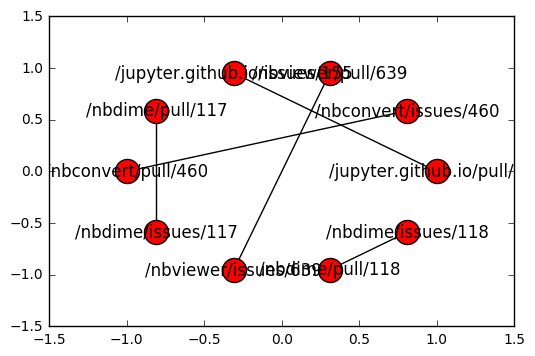

In [9]:
%matplotlib inline
pos=pulls.circular_layout()
pulls.draw_networkx_nodes(pos=pos)
pulls.draw_networkx_edges(pos=pos)
pulls.draw_networkx_labels(pos=pos);